In [162]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf, adfuller
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from mpl_toolkits.mplot3d import Axes3D

# 1. Przypadek jednowymiarowy

### **Wczytanie danych**

In [163]:
start_date = '2014-01-02'
end_date = '2024-03-31'
usd_yuan_ticker = 'CNYUSD=X'
oil_ticker = 'CL=F'
all_data = yf.download(tickers=[usd_yuan_ticker, oil_ticker], start=start_date, end=end_date)["Close"]
all_data = all_data.rename(columns={oil_ticker: "oil", usd_yuan_ticker: "currency"})

[*********************100%%**********************]  2 of 2 completed


In [164]:
all_data.head()

Ticker,oil,currency
Date,,
2014-01-02,95.440002,0.165453
2014-01-03,93.959999,0.165544
2014-01-06,93.430000,0.165522
2014-01-07,93.669998,0.165489
2014-01-08,92.330002,0.165530


In [165]:
date = all_data.index
Date = pd.to_datetime(date)
print(len(Date))

Oil_with = all_data["oil"]
Currency_start = all_data["currency"]

2672


In [166]:
print(all_data.isnull().sum())

Ticker
oil         96
currency     4
dtype: int64


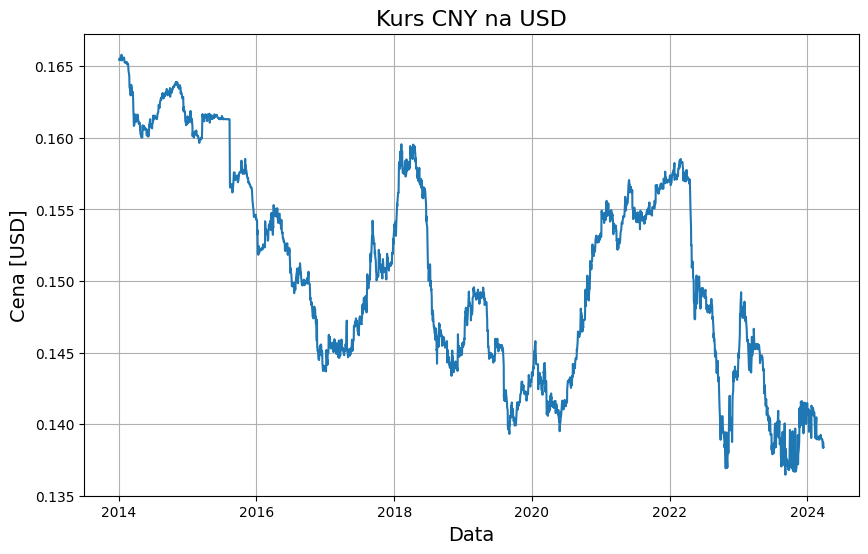

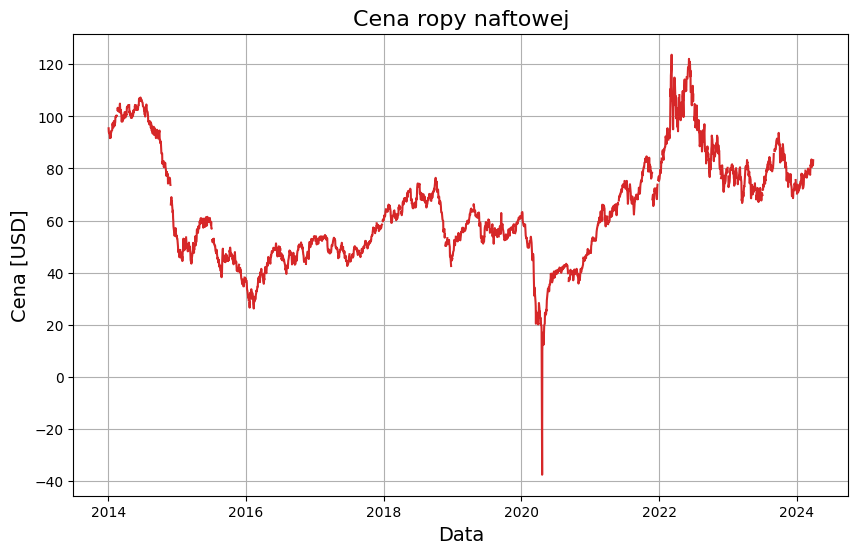

In [167]:
plt.figure(figsize=(10, 6))
plt.plot(Date, Currency_start, c="C0")
plt.title("Kurs CNY na USD", fontsize=16)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Cena [USD]", fontsize=14)
plt.grid(True)
plt.show()



plt.figure(figsize=(10, 6))
plt.plot(Date, Oil_with, c="C3")
plt.title("Cena ropy naftowej", fontsize=16)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Cena [USD]", fontsize=14)
plt.grid(True)
plt.show()


In [168]:
Oil = np.where(Oil_with < 0, np.nan, Oil_with)

Oil = np.interp(np.arange(len(Date)), np.arange(len(Oil))[~np.isnan(Oil)], Oil[~np.isnan(Oil)])
Currency = np.interp(np.arange(len(Date)), np.arange(len(Currency_start))[~np.isnan(Currency_start)], Currency_start[~np.isnan(Currency_start)])
print(len(Oil), len(Currency))

2672 2672


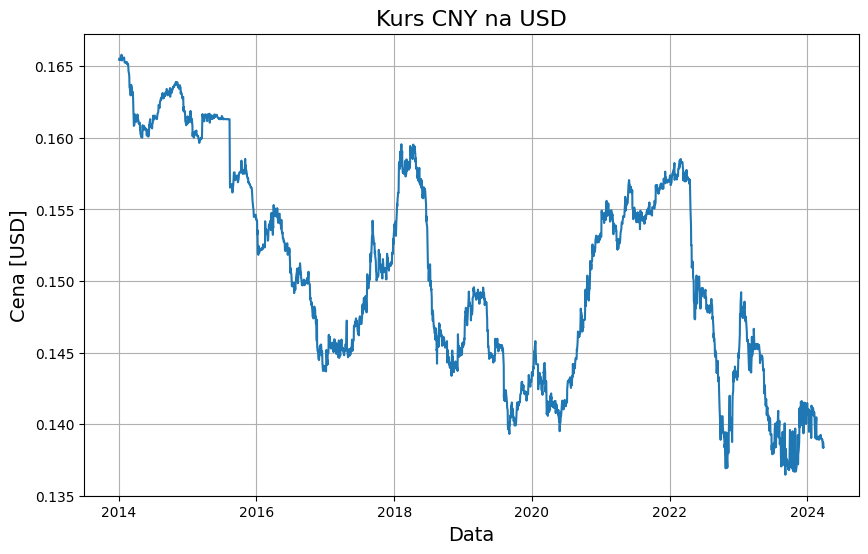

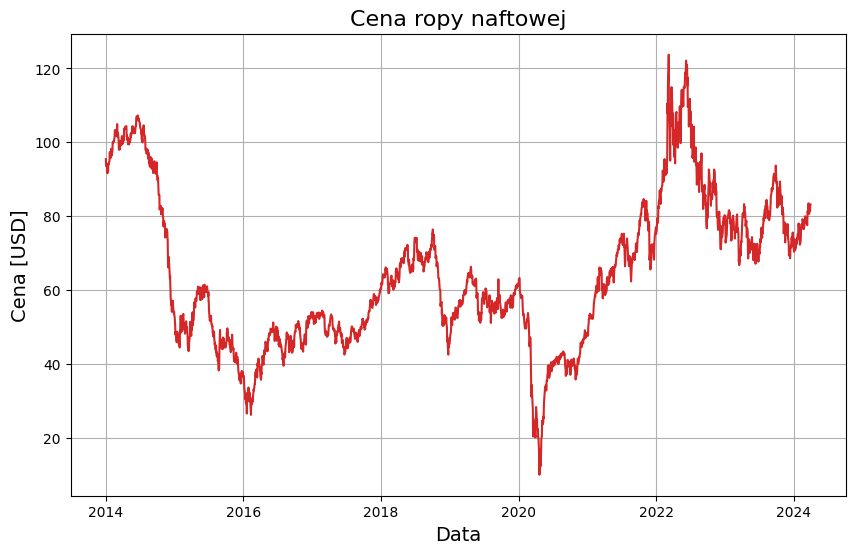

In [169]:
plt.figure(figsize=(10, 6))
plt.plot(Date, Currency, c="C0")
plt.title("Kurs CNY na USD", fontsize=16)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Cena [USD]", fontsize=14)
plt.grid(True)
plt.show()



plt.figure(figsize=(10, 6))
plt.plot(Date, Oil, c="C3")
plt.title("Cena ropy naftowej", fontsize=16)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Cena [USD]", fontsize=14)
plt.grid(True)
plt.show()


In [170]:
new_all_data = all_data.copy() 
new_all_data["oil"] = Oil
new_all_data["currency"] = Currency
Oil = new_all_data["oil"]
Currency = new_all_data["currency"]

In [171]:
print(new_all_data.isnull().sum())

Ticker
oil         0
currency    0
dtype: int64


In [172]:
new_all_data.head()

Ticker,oil,currency
Date,,
2014-01-02,95.440002,0.165453
2014-01-03,93.959999,0.165544
2014-01-06,93.430000,0.165522
2014-01-07,93.669998,0.165489
2014-01-08,92.330002,0.165530


### ACF przed czyszczeniem ( tylko wyrzucono NAN)

In [173]:
h = 100

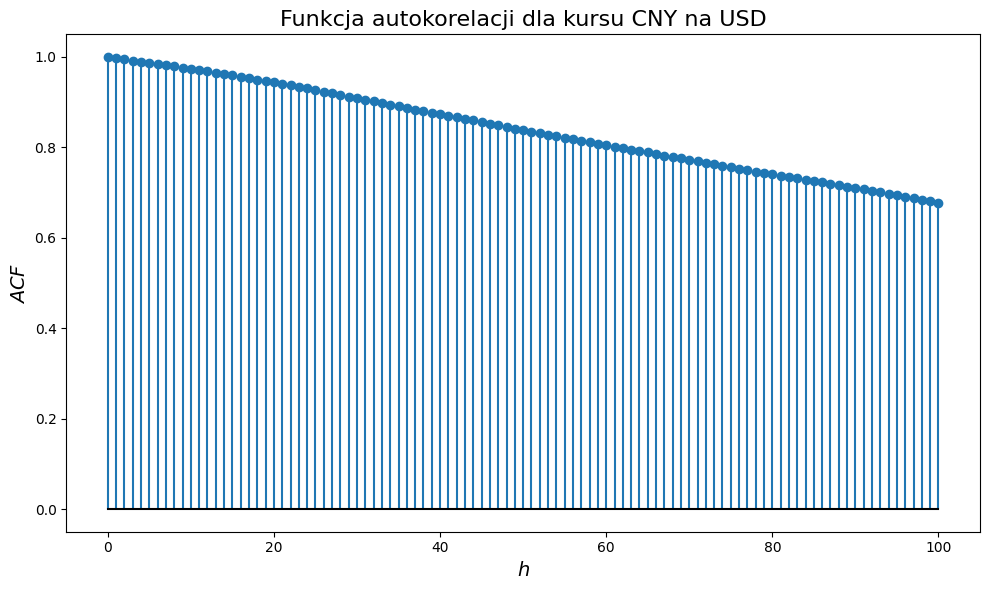

In [174]:
acf_currency = acf(Currency, nlags=h, fft=False)

plt.figure(figsize=(10, 6))
plt.stem(np.arange(0, h + 1), acf_currency, basefmt="black")
plt.title("Funkcja autokorelacji dla kursu CNY na USD", fontsize=16)
plt.xlabel("$h$", fontsize=14)
plt.ylabel("$ACF$", fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\aleks\AppData\Local\Temp\ipykernel_21328\2204901341.py:4: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(np.arange(0, h + 1), acf_currency, "r", markerfmt = "ro", basefmt='black')


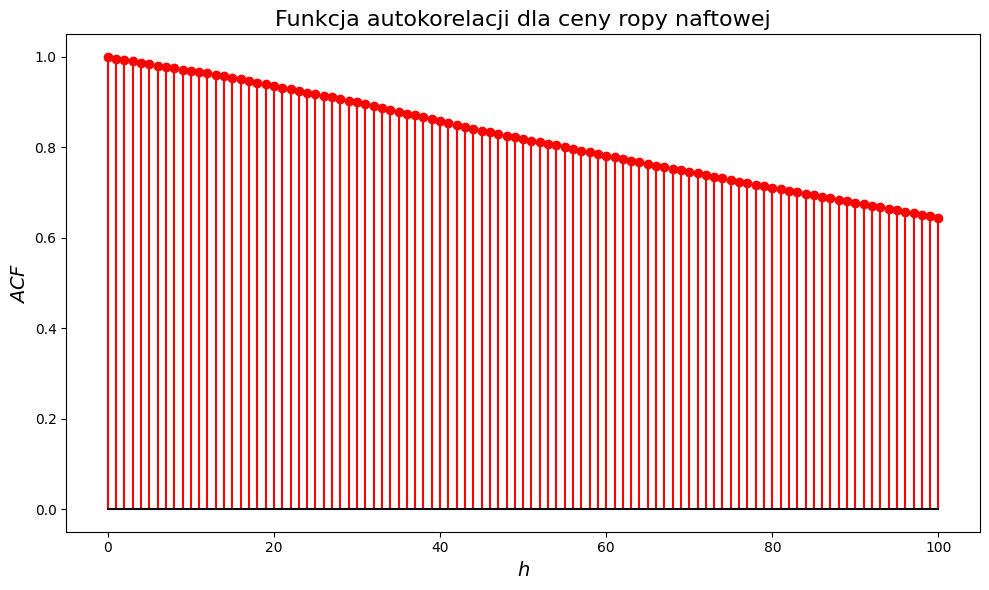

In [175]:
acf_currency = acf(Oil, nlags=h, fft=False)

plt.figure(figsize=(10, 6))
plt.stem(np.arange(0, h + 1), acf_currency, "r", markerfmt = "ro", basefmt='black')
plt.title("Funkcja autokorelacji dla ceny ropy naftowej", fontsize=16)
plt.xlabel("$h$", fontsize=14)
plt.ylabel("$ACF$", fontsize=14)
plt.tight_layout()
plt.show()

### **Transformacja danych**

In [176]:
Oil_transformed = Oil.pct_change(fill_method=None)
Currency_transformed = Currency.pct_change(fill_method=None)

print(sum(np.isnan(Oil_transformed)))
print(sum(np.isnan(Currency_transformed)))

nan_indices_oil = Oil_transformed.index[Oil_transformed.isna()]
nan_indices_currency = Currency_transformed.index[Currency_transformed.isna()]

print(nan_indices_oil)
print(nan_indices_currency)

1
1
DatetimeIndex(['2014-01-02'], dtype='datetime64[ns]', name='Date', freq='B')
DatetimeIndex(['2014-01-02'], dtype='datetime64[ns]', name='Date', freq='B')


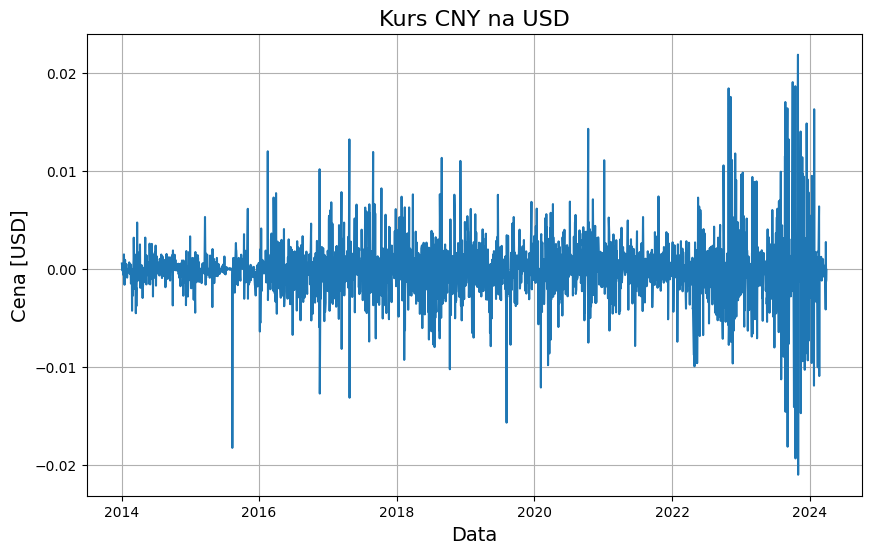

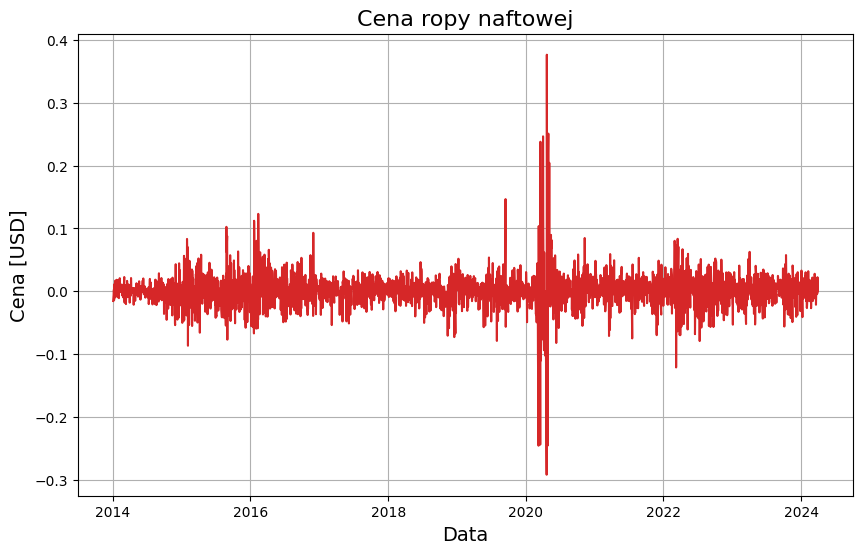

In [177]:
plt.figure(figsize=(10, 6))
plt.plot(Date, Currency_transformed, c="C0")
plt.title("Kurs CNY na USD", fontsize=16)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Cena [USD]", fontsize=14)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Date, Oil_transformed, c="C3")
plt.title("Cena ropy naftowej", fontsize=16)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Cena [USD]", fontsize=14)
plt.grid(True)
plt.show()

### ACF po transformacji

In [178]:
Oil_clean_2 = Oil_transformed.dropna()
Currency_clean_2 = Currency_transformed.dropna()

print(len(Date), len(Oil_clean_2), len(Currency_clean_2))

2672 2671 2671


In [179]:
Date = Date[1:]

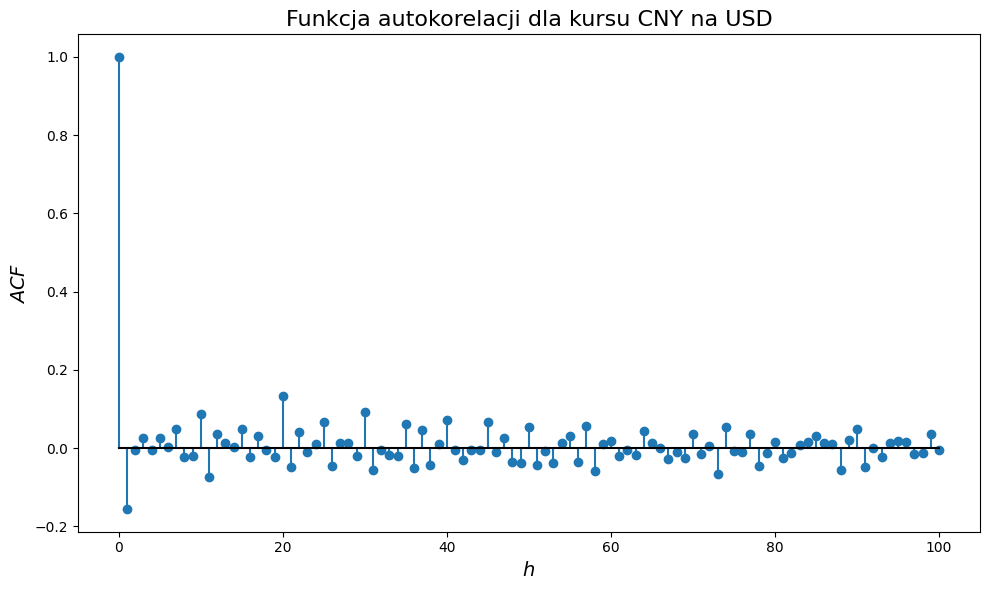

In [180]:
acf_currency = acf(Currency_clean_2, nlags=h, fft=False)

plt.figure(figsize=(10, 6))
plt.stem(np.arange(0, h + 1), acf_currency, basefmt="black")
plt.title("Funkcja autokorelacji dla kursu CNY na USD", fontsize=16)
plt.xlabel("$h$", fontsize=14)
plt.ylabel("$ACF$", fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\aleks\AppData\Local\Temp\ipykernel_21328\71911671.py:4: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(np.arange(0, h + 1), acf_currency, "r", markerfmt = "ro", basefmt='black')


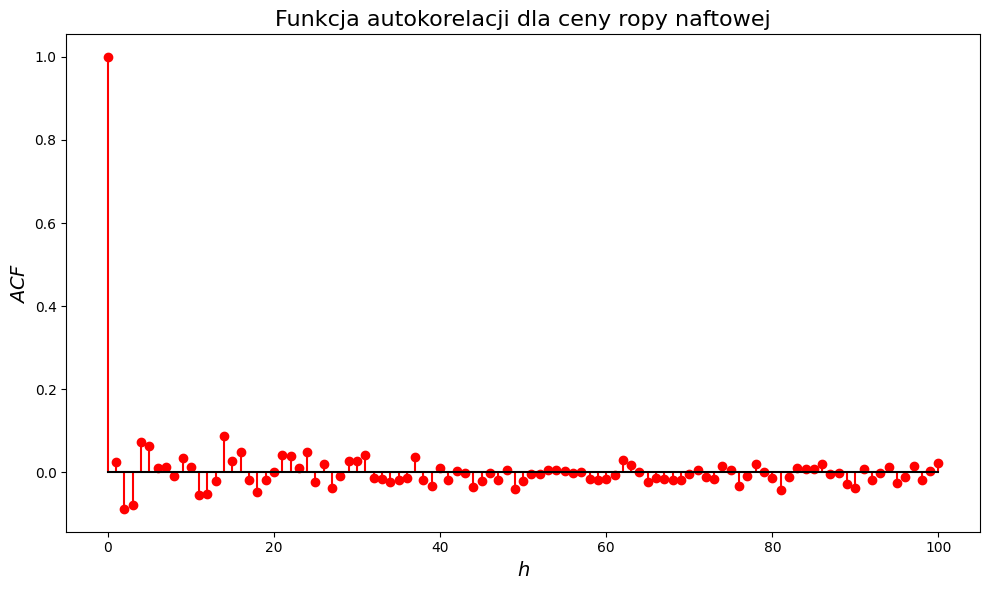

In [181]:
acf_currency = acf(Oil_clean_2, nlags=h, fft=False)

plt.figure(figsize=(10, 6))
plt.stem(np.arange(0, h + 1), acf_currency, "r", markerfmt = "ro", basefmt='black')
plt.title("Funkcja autokorelacji dla ceny ropy naftowej", fontsize=16)
plt.xlabel("$h$", fontsize=14)
plt.ylabel("$ACF$", fontsize=14)
plt.tight_layout()
plt.show()

### **ADF test**

In [182]:
def adfuller_test(series, sig=0.05): 
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 
    stats   = round(res[0], 3) 

    if p_value <= sig:
        print(f"Statystyka testowa = {stats}, p-Value = {p_value} => Stationary. ")
    else:
        print(f"Statystyka testowa = {stats}, p-value = {p_value} => Non-stationary.")

In [183]:
adfuller_test(Oil_clean_2)
adfuller_test(Currency_clean_2)

Statystyka testowa = -9.103, p-Value = 0.0 => Stationary. 
Statystyka testowa = -7.887, p-Value = 0.0 => Stationary. 


### **Kwantyle**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


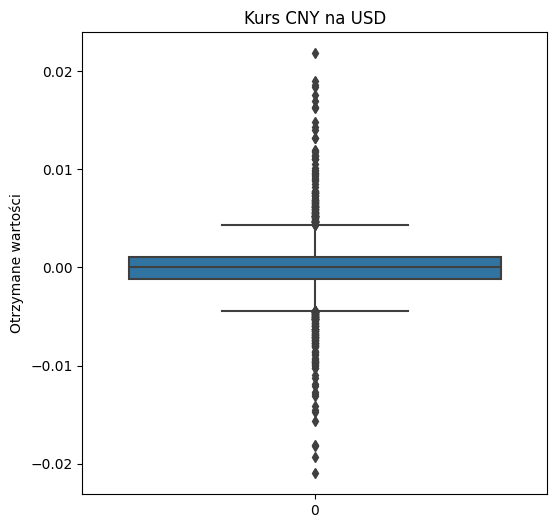

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


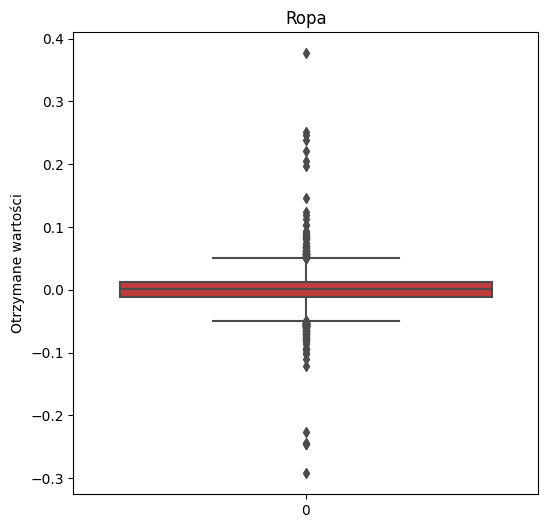

In [184]:
plt.figure(figsize=(6, 6))
sns.boxplot(Currency_transformed, color="C0") 
plt.ylabel("Otrzymane wartości")
plt.title("Kurs CNY na USD")
plt.legend(frameon=False, fontsize = 11)
plt.show()

plt.figure(figsize=(6, 6)) # są osobno bo razem źle wyglądały
sns.boxplot(Oil_transformed, color="C3") 
plt.ylabel("Otrzymane wartości")
plt.title("Ropa")
plt.legend(frameon=False, fontsize = 11)
plt.show()

In [185]:
oil_q1 = np.quantile(Oil_clean_2, 0.25, interpolation="midpoint")
oil_q2 = np.median(Oil_clean_2)
oil_q3 = np.quantile(Oil_clean_2, 0.75, interpolation="midpoint")

currency_q1 = np.quantile(Currency_clean_2, 0.25, interpolation="midpoint")
currency_q2 = np.median(Currency_clean_2)
currency_q3 = np.quantile(Currency_clean_2, 0.75, interpolation="midpoint")

data_q = {
    'Kwartyl': ['Q1', 'Q2', 'Q3'],
    'Oil': [oil_q1, oil_q2, oil_q3],
    'Currency': [currency_q1, currency_q2, currency_q3]
}

df = pd.DataFrame(data_q)
df


,Kwartyl,Oil,Currency
0,Q1,-0.012101,-0.001146
1,Q2,0.000828,0.000000
2,Q3,0.012772,0.001043


### **Wartosci dystrybuanty**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


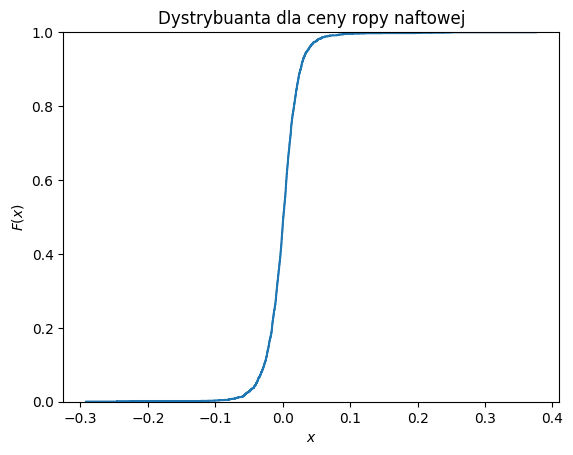

In [186]:
sns.ecdfplot(data = Oil_clean_2)
plt.title("Dystrybuanta dla ceny ropy naftowej")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.legend(frameon=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


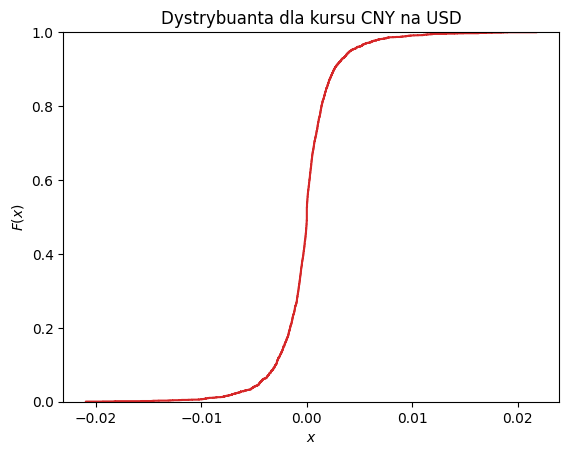

In [187]:
sns.ecdfplot(data = Currency_clean_2, c = 'C3')
plt.title("Dystrybuanta dla kursu CNY na USD")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.legend(frameon=False)

### **Dopasowanie rozkładu**

In [188]:
params_Oil = stats.t.fit(Oil_clean_2)
params_Currency = stats.t.fit(Currency_clean_2)

t_student_Oil = stats.t(*params_Oil)
t_student_Currency = stats.t(*params_Currency)

Oil_sample = t_student_Oil.rvs(size=len(Oil_clean_2))
Currency_sample = t_student_Currency.rvs(size=len(Currency_clean_2))

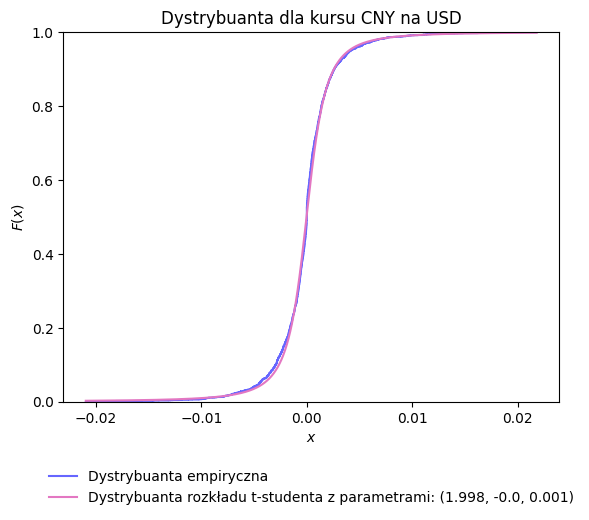

In [189]:
sns.ecdfplot(data = Currency_clean_2, label = "Dystrybuanta empiryczna", color = "b", alpha = 0.6)

t_Currency = np.linspace(np.min(Currency_clean_2), np.max(Currency_clean_2), len(Currency_clean_2))
th_F = t_student_Currency.cdf(t_Currency)
plt.plot(t_Currency, th_F, label = f"Dystrybuanta rozkładu t-studenta z parametrami: {(round(params_Currency[0], 3), round(params_Currency[1], 3), round(params_Currency[2], 3))}",  color = "C6")

plt.title("Dystrybuanta dla kursu CNY na USD")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.15))

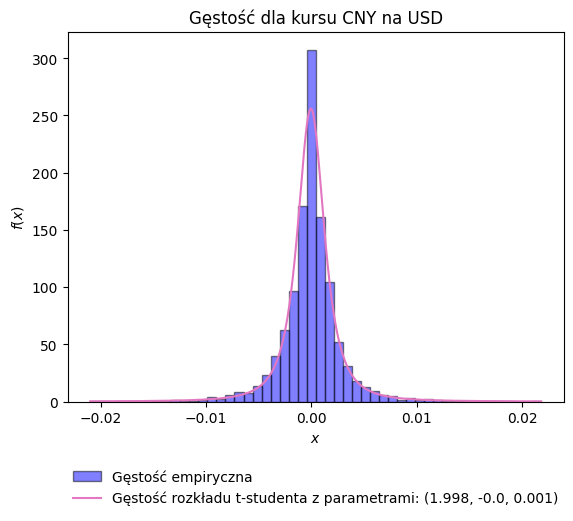

In [190]:
plt.hist(Currency_clean_2, bins = 50, edgecolor='k', density=True, label = "Gęstość empiryczna", color = "b", alpha = 0.5)

f_theo = t_student_Currency.pdf(t_Currency)
plt.plot(t_Currency, f_theo, label = f"Gęstość rozkładu t-studenta z parametrami: {(round(params_Currency[0], 3), round(params_Currency[1], 3), round(params_Currency[2], 3))}", color = "C6")
plt.title("Gęstość dla kursu CNY na USD")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(frameon=False,  loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.show()

Text(0.5, 1.0, 'Wykres kwantylowy dla kursu CNY na USD')

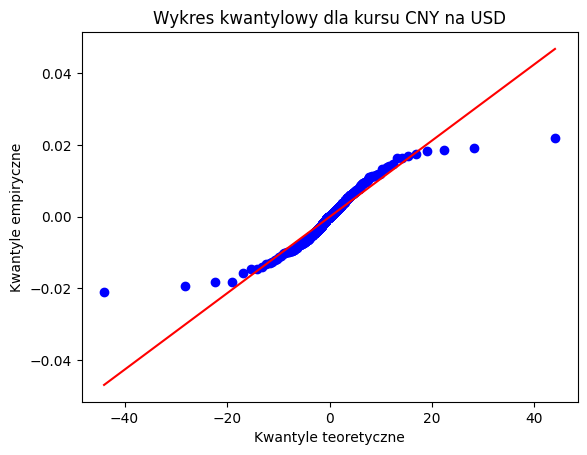

In [191]:
stats.probplot(Currency_clean_2, dist=stats.t, sparams=(params_Currency[0],), plot=plt)

# Dodanie etykiet osi i tytułu
plt.xlabel("Kwantyle teoretyczne")
plt.ylabel("Kwantyle empiryczne")
plt.title("Wykres kwantylowy dla kursu CNY na USD")


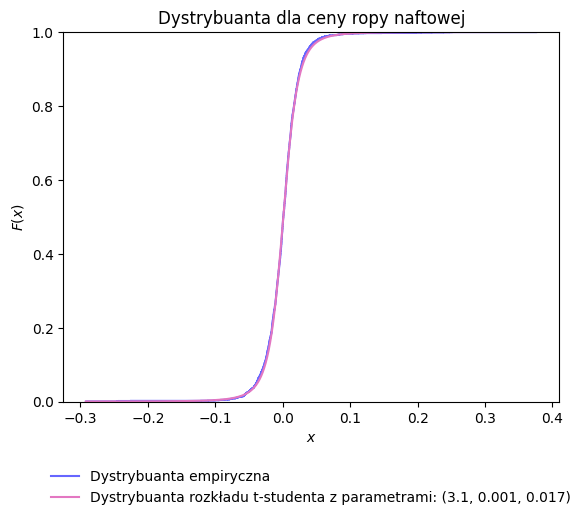

In [192]:
sns.ecdfplot(data = Oil_clean_2, label = "Dystrybuanta empiryczna", color = "b", alpha = 0.6)

t_Oil = np.linspace(np.min(Oil_clean_2), np.max(Oil_clean_2), len(Oil_clean_2))
th_F = t_student_Oil.cdf(t_Oil)
plt.plot(t_Oil, th_F, label = f"Dystrybuanta rozkładu t-studenta z parametrami: {(round(params_Oil[0], 3), round(params_Oil[1], 3), round(params_Oil[2], 3))}", color = "C6")

plt.title("Dystrybuanta dla ceny ropy naftowej")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.legend(frameon=False,  loc='upper center', bbox_to_anchor=(0.5, -0.15))

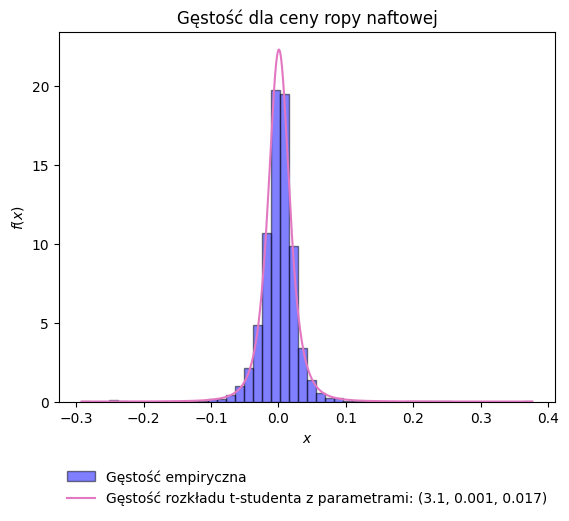

In [193]:
plt.hist(Oil_clean_2, bins = 50, edgecolor='k', density=True, label = "Gęstość empiryczna", color = "b", alpha = 0.5)

f_theo = t_student_Oil.pdf(t_Oil)
plt.plot(t_Oil, f_theo, label = f"Gęstość rozkładu t-studenta z parametrami: {(round(params_Oil[0], 3), round(params_Oil[1], 3), round(params_Oil[2], 3))}", color = "C6")
plt.title("Gęstość dla ceny ropy naftowej")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(frameon=False,  loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.show()

Text(0.5, 1.0, 'Wykres kwantylowy dla ceny ropy naftowej')

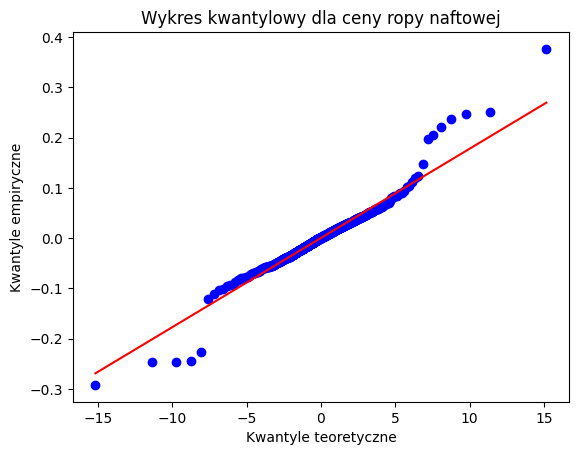

In [194]:
stats.probplot(Oil_clean_2, dist=stats.t, sparams=(params_Oil[0],), plot=plt)
plt.xlabel("Kwantyle teoretyczne")
plt.ylabel("Kwantyle empiryczne")
plt.title("Wykres kwantylowy dla ceny ropy naftowej")


### **Miary ryzyka wyznaczone drugim sposobem**

In [195]:
def semi_standard_deviation(data):
    mean = np.mean(data)  # Średnia
    deviations = data - mean  # Różnice od średniej
    negative_deviations = deviations[deviations < 0]  # Wybór tylko wartości ujemnych od średniej
    semi_std = np.mean(np.abs(negative_deviations))  # Średnia wartość bezwzględnych różnic ujemnych od średniej
    return semi_std

In [196]:
data_Oil= {
    'Nazwa_miary_zmiennosci': ['Odchylenie_standardowe', 'Odchylenie_przecietne', 'Odchylenie_cwiartkowe', 'Semiodchylenie_standardowe', 'Semiodchylenie_przecietne'],
    'Oil_sample': [
        np.std(Oil_sample),
        np.mean(np.abs(Oil_sample - np.mean(Oil_sample))),
        (1/2) * (np.quantile(Oil_sample, 0.75, interpolation="midpoint") - np.quantile(Oil_sample, 0.25, interpolation="midpoint")),
        semi_standard_deviation(Oil_sample),
        np.mean(np.abs(Oil_sample[Oil_sample < np.mean(Oil_sample)] - np.mean(Oil_sample)))
    ],

    'Oil_from_data': [
        np.std(Oil_clean_2),
        np.mean(np.abs(Oil_clean_2 - np.mean(Oil_clean_2))),
        (1/2) * (np.quantile(Oil_clean_2, 0.75, interpolation="midpoint") - np.quantile(Oil_clean_2, 0.25, interpolation="midpoint")),
        semi_standard_deviation(Oil_clean_2),
        np.mean(np.abs(Oil_clean_2[Oil_clean_2 < np.mean(Oil_clean_2)] - np.mean(Oil_clean_2)))
    ]
}


df = pd.DataFrame(data_Oil)
df

,Nazwa_miary_zmiennosci,Oil_sample,Oil_from_data
0,Odchylenie_standardowe,0.032741,0.029050
1,Odchylenie_przecietne,0.019290,0.018140
2,Odchylenie_cwiartkowe,0.012955,0.012436
3,Semiodchylenie_standardowe,0.018901,0.018450
4,Semiodchylenie_przecietne,0.018901,0.018450


In [197]:
data = {
    'Nazwa_miary_zmiennosci': ['Odchylenie_standardowe', 'Odchylenie_przecietne', 'Odchylenie_cwiartkowe', 'Semiodchylenie_standardowe', 'Semiodchylenie_przecietne'],
    'Currency_sample': [
        np.std(Currency_sample),
        np.mean(np.abs(Currency_sample - np.mean(Currency_sample))),
        (1/2) * (np.quantile(Currency_sample, 0.75, interpolation="midpoint") - np.quantile(Currency_sample, 0.25, interpolation="midpoint")),
        semi_standard_deviation(Currency_sample),      
        np.mean(np.abs(Currency_sample[Currency_sample < np.mean(Currency_sample)] - np.mean(Currency_sample)))
    ],
    'Currency': [
        np.std(Currency_clean_2),
        np.mean(np.abs(Currency_clean_2 - np.mean(Currency_clean_2))),
        (1/2) * (np.quantile(Currency_clean_2, 0.75, interpolation="midpoint") - np.quantile(Currency_clean_2, 0.25, interpolation="midpoint")),
        semi_standard_deviation(Currency_clean_2),   
        np.mean(np.abs(Currency_clean_2[Currency_clean_2 < np.mean(Currency_clean_2)] - np.mean(Currency_clean_2)))
    ]
}


df = pd.DataFrame(data)
df

,Nazwa_miary_zmiennosci,Currency_sample,Currency
0,Odchylenie_standardowe,0.003666,0.003028
1,Odchylenie_przecietne,0.001938,0.001856
2,Odchylenie_cwiartkowe,0.001182,0.001094
3,Semiodchylenie_standardowe,0.001902,0.001989
4,Semiodchylenie_przecietne,0.001902,0.001989


In [198]:
# all_data_filtered = all_data.copy() 
# all_data_filtered["oil"] = Oil_transformed
# all_data_filtered["currency"] = Currency_transformed

# all_data_filtered.to_csv("oil_currency.csv", index=False)
# all_data_filtered

# 2. Przypadek wielowymiarowy

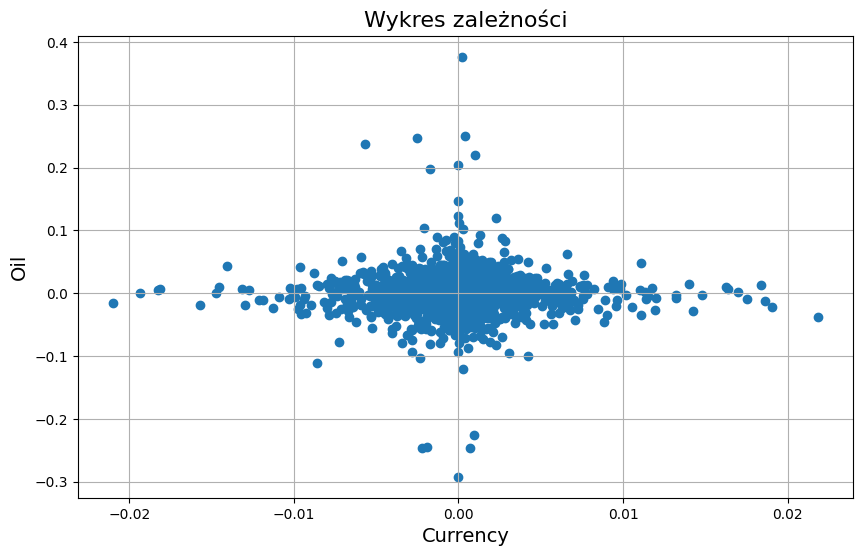

In [199]:
plt.figure(figsize=(10, 6))
plt.scatter(Currency_clean_2, Oil_clean_2)
plt.title("Wykres zależności", fontsize=16)
plt.xlabel("Currency", fontsize=14)
plt.ylabel("Oil", fontsize=14)
plt.grid(True)
plt.show()

In [200]:
a = 0.65
b = 0.35

Wallet = np.multiply(a, Oil_clean_2) + np.multiply(b, Currency_clean_2)
# Date = Date[1:]

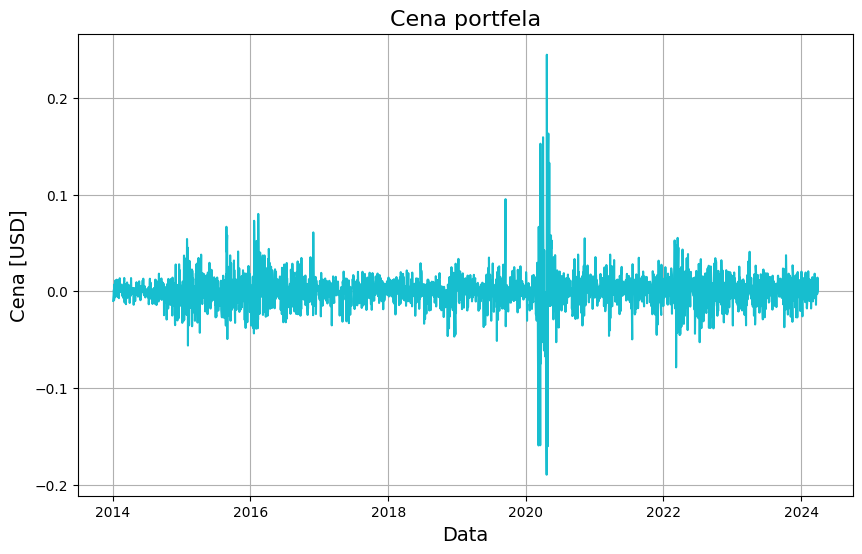

In [201]:
plt.figure(figsize=(10, 6))
plt.plot(Date, Wallet, c="C9")
plt.title("Cena portfela", fontsize=16)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Cena [USD]", fontsize=14)
plt.grid(True)
plt.show()

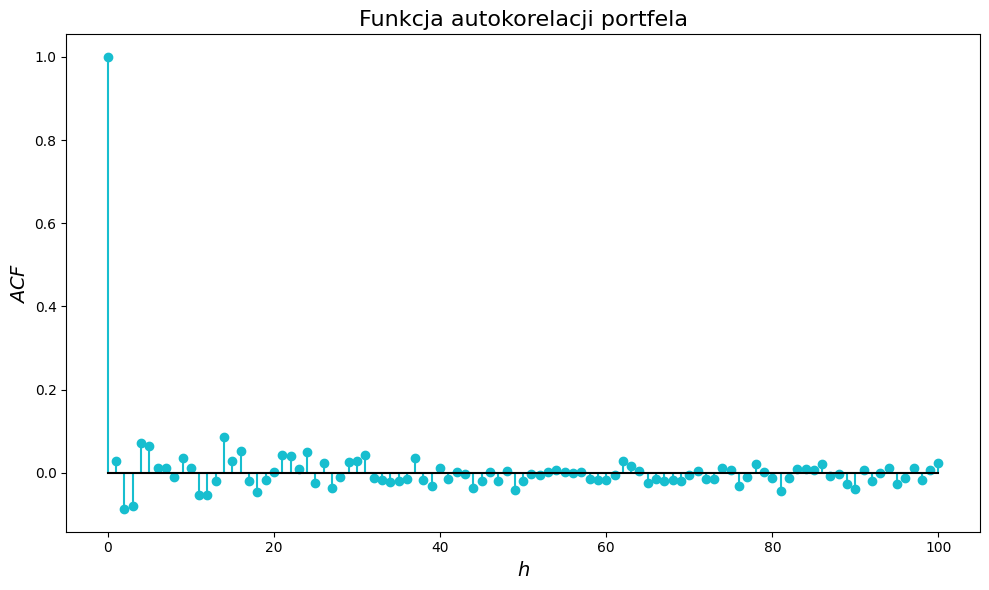

In [202]:
acf_currency = acf(Wallet, nlags=h, fft=False)

plt.figure(figsize=(10, 6))
plt.stem(np.arange(0, h + 1), acf_currency, linefmt='C9', markerfmt='C9o', basefmt='black')
plt.title("Funkcja autokorelacji portfela", fontsize=16)
plt.xlabel("$h$", fontsize=14)
plt.ylabel("$ACF$", fontsize=14)
plt.tight_layout()
plt.show()

### **Miara/y zmienności dla portfela**

In [203]:
data = {
    'Nazwa_miary_zmiennosci': ['Odchylenie_standardowe', 'Odchylenie_przecietne', 'Odchylenie_cwiartkowe', 'Semiodchylenie_standardowe', 'Semiodchylenie_przecietne'],
    'Currency': [
        np.std(Currency_clean_2),
        np.mean(np.abs(Currency_clean_2 - np.mean(Currency_clean_2))),
        (1/2) * (np.quantile(Currency_clean_2, 0.75, interpolation="midpoint") - np.quantile(Currency_clean_2, 0.25, interpolation="midpoint")),
        semi_standard_deviation(Currency_clean_2),   
        np.mean(np.abs(Currency_clean_2[Currency_clean_2 < np.mean(Currency_clean_2)] - np.mean(Currency_clean_2)))
    ],
    'Oil': [
        np.std(Oil_clean_2),
        np.mean(np.abs(Oil_clean_2 - np.mean(Oil_clean_2))),
        (1/2) * (np.quantile(Oil_clean_2, 0.75, interpolation="midpoint") - np.quantile(Oil_clean_2, 0.25, interpolation="midpoint")),
        semi_standard_deviation(Oil_clean_2),
        np.mean(np.abs(Oil_clean_2[Oil_clean_2 < np.mean(Oil_clean_2)] - np.mean(Oil_clean_2)))
    ],
    'Wallet': [
        np.std(Wallet),
        np.mean(np.abs(Wallet - np.mean(Wallet))),
        (1/2) * (np.quantile(Wallet, 0.75, interpolation="midpoint") - np.quantile(Wallet, 0.25, interpolation="midpoint")),
        semi_standard_deviation(Wallet),
        np.mean(np.abs(Wallet[Wallet < np.mean(Wallet)] - np.mean(Wallet)))
    ]
}


df = pd.DataFrame(data)
df

,Nazwa_miary_zmiennosci,Currency,Oil,Wallet
0,Odchylenie_standardowe,0.003028,0.029050,0.018913
1,Odchylenie_przecietne,0.001856,0.018140,0.011836
2,Odchylenie_cwiartkowe,0.001094,0.012436,0.008411
3,Semiodchylenie_standardowe,0.001989,0.018450,0.012235
4,Semiodchylenie_przecietne,0.001989,0.018450,0.012235


### **Kwantyle**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


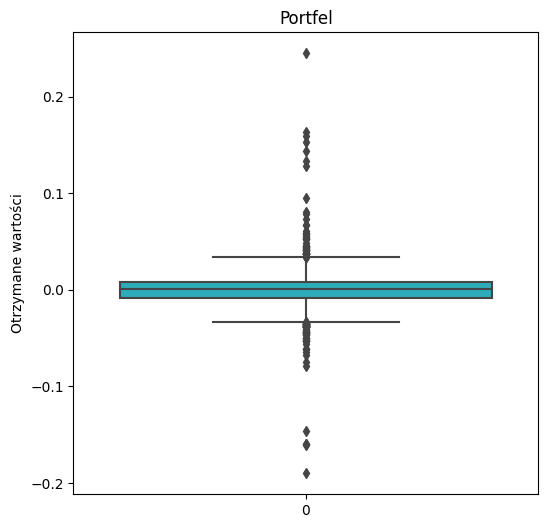

In [204]:
plt.figure(figsize=(6, 6)) 
sns.boxplot(list(Wallet), color="C9") 
plt.ylabel("Otrzymane wartości")
plt.title("Portfel")
plt.legend(frameon=False, fontsize = 11)
plt.show()

In [205]:
wallet_q1 = np.quantile(Wallet, 0.25, interpolation="midpoint")
wallet_q2 = np.median(Wallet)
wallet_q3 = np.quantile(Wallet, 0.75, interpolation="midpoint")


data_q = {
    'Kwartyl': ['Q1', 'Q2', 'Q3'],
    'Wallet': [wallet_q1, wallet_q2, wallet_q3],
}

df = pd.DataFrame(data_q)
df


,Kwartyl,Wallet
0,Q1,-0.008201
1,Q2,0.000612
2,Q3,0.008621


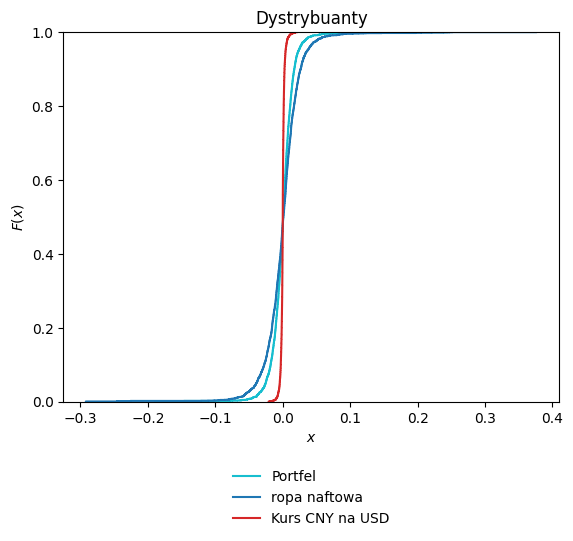

In [206]:
sns.ecdfplot(data = Wallet, label = "Portfel", color = "C9")
sns.ecdfplot(data = Oil_clean_2, label = "ropa naftowa", color = "C0")
sns.ecdfplot(data = Currency_clean_2, label = "Kurs CNY na USD", color = "C3")
plt.title("Dystrybuanty")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.15))

In [207]:
params_Wallet = stats.t.fit(Wallet)
t_student_Wallet = stats.t(*params_Wallet)
Wallet_sample = t_student_Wallet.rvs(size=len(Wallet))

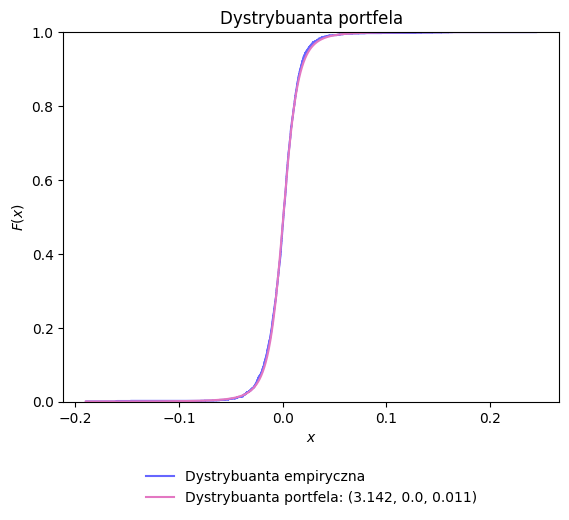

In [208]:
sns.ecdfplot(data = Wallet, label = "Dystrybuanta empiryczna", color = "b", alpha = 0.6)

t_Wallet = np.linspace(np.min(Wallet), np.max(Wallet), len(Wallet))
th_F = t_student_Wallet.cdf(t_Wallet)
plt.plot(t_Wallet, th_F, label = f"Dystrybuanta portfela: {(round(params_Wallet[0], 3), round(params_Wallet[1], 3), round(params_Wallet[2], 3))}",  color = "C6")

plt.title("Dystrybuanta portfela")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.15))

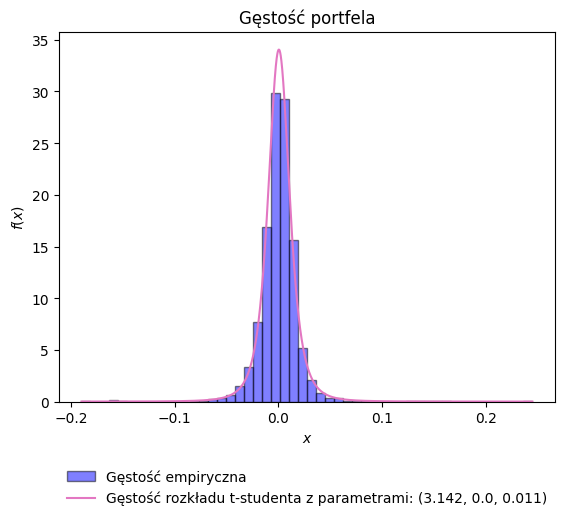

In [209]:
plt.hist(Wallet, bins = 50, edgecolor='k', density=True, label = "Gęstość empiryczna", color = "b", alpha = 0.5)

f_theo = t_student_Wallet.pdf(t_Wallet)
plt.plot(t_Wallet, f_theo, label = f"Gęstość rozkładu t-studenta z parametrami: {(round(params_Wallet[0], 3), round(params_Wallet[1], 3), round(params_Wallet[2], 3))}", color = "C6")
plt.title("Gęstość portfela")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(frameon=False,  loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.show()

Text(0.5, 1.0, 'Wykres kwantylowy dla portfela')

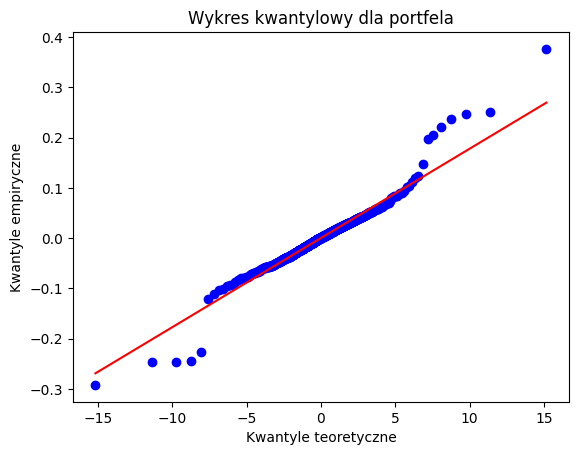

In [210]:
stats.probplot(Oil_clean_2, dist=stats.t, sparams=(params_Oil[0],), plot=plt)
plt.xlabel("Kwantyle teoretyczne")
plt.ylabel("Kwantyle empiryczne")
plt.title("Wykres kwantylowy dla portfela")

### drugi sposob na miary

In [211]:
data = {
    'Nazwa_miary_zmiennosci': ['Odchylenie_standardowe', 'Odchylenie_przecietne', 'Odchylenie_cwiartkowe', 'Semiodchylenie_standardowe', 'Semiodchylenie_przecietne'],
    'Wallet_sample': [
        np.std(Wallet_sample),
        np.mean(np.abs(Wallet_sample - np.mean(Wallet_sample))),
        (1/2) * (np.quantile(Wallet_sample, 0.75, interpolation="midpoint") - np.quantile(Wallet_sample, 0.25, interpolation="midpoint")),
        semi_standard_deviation(Wallet_sample),   
        np.mean(np.abs(Wallet_sample[Wallet_sample < np.mean(Wallet_sample)] - np.mean(Wallet_sample)))
    ],
    'Wallet': [
        np.std(Wallet),
        np.mean(np.abs(Wallet - np.mean(Wallet))),
        (1/2) * (np.quantile(Wallet, 0.75, interpolation="midpoint") - np.quantile(Wallet, 0.25, interpolation="midpoint")),
        semi_standard_deviation(Wallet),
        np.mean(np.abs(Wallet[Wallet < np.mean(Wallet)] - np.mean(Wallet)))
    ]
}


df = pd.DataFrame(data)
df

,Nazwa_miary_zmiennosci,Wallet_sample,Wallet
0,Odchylenie_standardowe,0.017766,0.018913
1,Odchylenie_przecietne,0.011746,0.011836
2,Odchylenie_cwiartkowe,0.008383,0.008411
3,Semiodchylenie_standardowe,0.011594,0.012235
4,Semiodchylenie_przecietne,0.011594,0.012235


### **Dystrybuanta 2 wymiarowa**

In [212]:
def multi_ecdf(R1, R2):
    n1 = len(R1)
    n2 = len(R2)

    # Sortowanie wektorów
    R1 = np.sort(R1)
    R2 = np.sort(R2)
    
    # Granice R1 (min i max dla X)
    a = np.min(R1)
    b = np.max(R1)
    X = np.linspace(a, b, n1)
    
    # Granice R2 (min i max dla Y)
    c = np.min(R2)
    d = np.max(R2)
    Y = np.linspace(c, d, n2)
    
    # Przejściowe wektory (ile obserwacji wpada dla danego wiersza)
    Z1 = X.reshape(-1, 1) <= R1.reshape(1, -1)
    Z1 = np.sum(Z1, axis=1)[::-1].reshape(1, -1)
    Z2 = Y.reshape(-1, 1) <= R2.reshape(1, -1)
    Z2 = np.sum(Z2, axis=1)[::-1].reshape(-1, 1)

    # Tworzenie macierzy Z
    Z = np.dot(Z2, Z1) / n1 / n2
    return X, Y, Z

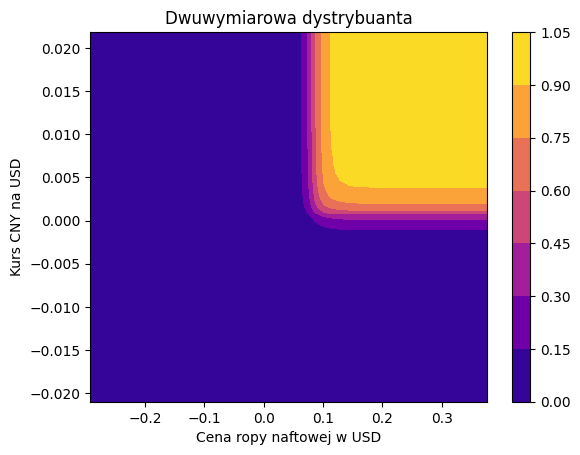

In [213]:
X, Y, Z = multi_ecdf(Oil_clean_2, Currency_clean_2)

plt.contourf(X, Y, Z, cmap='plasma')
plt.colorbar(label='')
plt.title('Dwuwymiarowa dystrybuanta')
plt.xlabel('Cena ropy naftowej w USD')
plt.ylabel('Kurs CNY na USD')
plt.show()

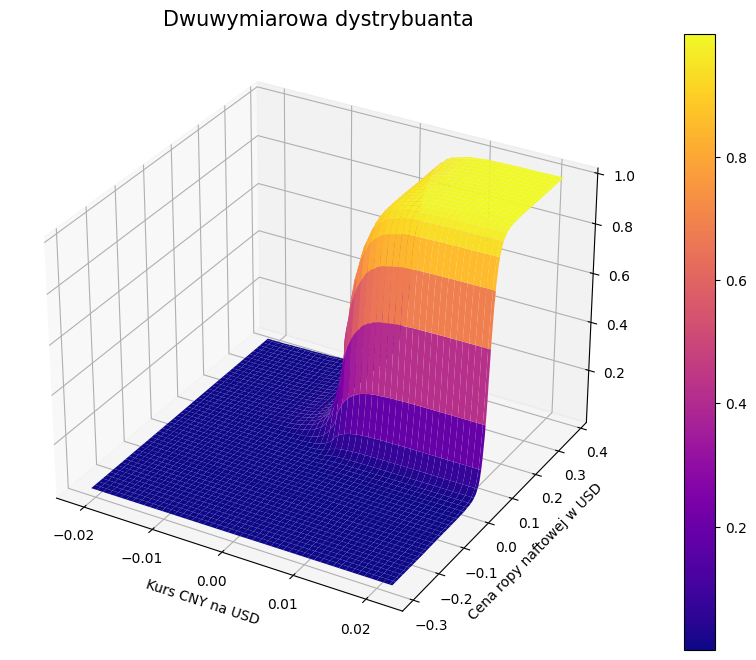

In [214]:
X, Y, Z = multi_ecdf(Currency_clean_2, Oil_clean_2)

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap='plasma')
fig.colorbar(surf, label='')
ax.set_xlabel('Kurs CNY na USD')
ax.set_ylabel('Cena ropy naftowej w USD')
ax.set_title('Dwuwymiarowa dystrybuanta', fontsize=15)

plt.show()
